## Import libraries 

In [1]:
import numpy as np
import pandas as pd
import swifter
import re
import string
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import swifter

from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas_profiling
from pandas_profiling import ProfileReport

## Import Dataset

In [2]:
df1 = pd.read_json(r'/home/ubuntu/Downloads/alert_data.json')

## Exploratory data analysis

In [3]:
profile = ProfileReport(df1)

In [4]:
# profile

## Data Preprocessing

In [5]:
df1.head()

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True


In [6]:
df1.shape, df1.size

((10000, 10), 100000)

In [7]:
df1.columns

Index(['subject', 'currentState', 'repeatCount', 'priority', 'healTime',
       'alertClass', 'alertSubClass', 'alertCategory', 'alertSubCategory',
       'alert_autoheal'],
      dtype='object')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subject           10000 non-null  object
 1   currentState      10000 non-null  object
 2   repeatCount       10000 non-null  int64 
 3   priority          10000 non-null  object
 4   healTime          10000 non-null  int64 
 5   alertClass        10000 non-null  object
 6   alertSubClass     10000 non-null  object
 7   alertCategory     10000 non-null  object
 8   alertSubCategory  10000 non-null  object
 9   alert_autoheal    10000 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 713.0+ KB


In [9]:
df1.describe()

,repeatCount,healTime
count,10000.000000,10000.000000
mean,2.137800,1705.875400
std,0.535014,5683.926477
min,2.000000,1.000000
25%,2.000000,240.000000
50%,2.000000,540.000000
75%,2.000000,900.000000
max,10.000000,76320.000000


In [10]:
# Checking Null Value
df1.isnull().mean()

subject             0.0
currentState        0.0
repeatCount         0.0
priority            0.0
healTime            0.0
alertClass          0.0
alertSubClass       0.0
alertCategory       0.0
alertSubCategory    0.0
alert_autoheal      0.0
dtype: float64

In [11]:
df1.describe(include = 'object')

,subject,currentState,priority,alertClass,alertSubClass,alertCategory,alertSubCategory
count,10000,10000,10000,10000,10000,10000,10000
unique,3407,1,4,9,21,10,69
top,Critical - Packet Loss=100% - 100 (>= 100),Ok,P1,Network,Switch,Others,Others
freq,531,10000,5052,4170,2594,2467,2467


In [12]:
df1.subject.tolist()

['FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6.1.4.1.12356.101.1.1000.0.802)',
 'Critical - Packet Loss=100% - 100 (>= 100)',
 'Critical - Packet Loss=100% - 100 (>= 100)',
 'SNMP request timeout on WC008_01.mpdnet.miami-police.net',
 'Critical - Packet Loss=100% - 100 (>= 100)',
 'RightFax Conversion Engine | Not Running',
 'Warning - RTA=75.390ms and Packet Loss=75% - 75 (>= 75)',
 'Warning - RTA=81.658ms and Packet Loss=75% - 75 (>= 75)',
 'Critical - RTA=1051.459ms and Packet Loss=25% - 1051.459 (>= 700)',
 'Critical - RTA=1052.128ms and Packet Loss=25% - 1052.128 (>= 700)',
 'Critical - RTA=1050.745ms and Packet Loss=25% - 1050.745 (>= 700)',
 'Critical - VeeamBackup_SRV-BCK-1 @ srv-vmware.vcso.us - vmware.datastore.capacity.usage 100 % (>= 97)',
 'Disk C:\\ Ok. Free Space 2114 MB; Disk Capacity 71326 MB.',
 'Attenuated Alert: FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6.1.4.1.12356.101.1.1000.0.802)',
 '[Cleared] hcs-west-emc-storage-monitor: We are not monitoring EMC storage d

In [13]:
# import re
# from nltk.tokenize import RegexpTokenizer

## Text Preprocessing

In [14]:
# class text_preprocess:
    
#     def __init__(self):
#         pass
    
#     def convert_to_lower(self, text):
#         return text.lower()
    
#     def remove_non_ascii(self, text):
#         return re.sub(r'[^\x00-\x7f]', r' ', text)
    
#     def remove_punctuation(self,text):
#         tokenizer = RegexpTokenizer(r'\w+')
#         return ' '.join(tokenizer.tokenize(text))
        
    
#     def preprocessText(self,text):            
#         return self.convert_to_lower(self.remove_non_ascii(self.remove_punctuation(text)))
    

In [15]:
#     if __name__ == "__main__": 
#         text_prpocess_obj = text_preprocess()
#         df.subject = df.subject.swifter.apply(lambda x: text_prpocess_obj.preprocessText(x))

In [16]:
# df.subject.tolist()

## Tokenization Of Text Columns

In [17]:
# import nltk
# from typing import List, Dict
# from nltk import word_tokenize
# from nltk.corpus import stopwords
# # from spacy.lang.en.stop_words import STOP_WORDS
# nltk.download('punkt')

In [18]:
# nltk.download('stopwords')
# stop_words = set(stopwords.words("english"))

In [19]:
# def Tokenize_text(text: str) -> List[str]:
#     text_tokens = word_tokenize(text)
#     text_without_stopwords = [word for word in text_tokens if word not in stop_words]
#     return text_without_stopwords

In [20]:
# df['subject'] = df.subject.swifter.apply(lambda x: Tokenize_text(x))

In [21]:
# df.subject.tolist()

In [22]:
from gensim.models import Word2Vec
from typing import List, Dict

In [23]:
w2v_model = Word2Vec(sentences = df1['subject'], vector_size=10, workers=2)

In [24]:
w2v_model

In [25]:
def create_vectors(docs: List[List[str]]) -> List[List[float]]:
    
    all_vectors: List = []

    for text_tokens in docs:
        zero_vector = np.zeros(w2v_model.vector_size)
        vectors: List = []
        for token in text_tokens:
            if token in w2v_model.wv:
                try:
                    vectors.append(w2v_model.wv[token])
                except KeyError:
                    continue
                    
        if vectors:
            vectors = np.asarray(vectors)
            avg_vector = vectors.mean(axis=0)
            all_vectors.append(avg_vector)
        else:
            all_vectors.append(zero_vector)
    return all_vectors

In [26]:
subject = create_vectors(df1.subject)

In [27]:
df2 = pd.DataFrame(subject)

In [28]:
df2

,0,1,2,3,4,5,6,7,8,9
0,1.126140,-1.597784,-1.019254,-0.603017,0.265615,0.990811,-0.705429,1.126052,0.812130,0.710297
1,0.904175,1.170022,0.217570,0.236529,0.130935,0.719905,-1.059507,-0.092756,-0.082306,0.554745
2,0.904175,1.170022,0.217570,0.236529,0.130935,0.719905,-1.059507,-0.092756,-0.082306,0.554745
3,-0.628583,0.888218,0.139007,-0.963426,0.313406,-0.472450,0.436530,-0.284979,0.597655,0.197891
4,0.904175,1.170022,0.217570,0.236529,0.130935,0.719905,-1.059507,-0.092756,-0.082306,0.554745
...,...,...,...,...,...,...,...,...,...,...
9995,-0.628583,0.888218,0.139007,-0.963426,0.313406,-0.472450,0.436530,-0.284979,0.597655,0.197891
9996,-0.859061,1.019169,0.272200,-1.009988,0.505984,-0.185063,0.412515,-0.270355,0.974920,0.149165
9997,-1.103832,1.011217,0.548265,-1.077313,-0.067564,-0.030902,0.857281,-0.070772,1.070073,-0.663135
9998,-0.873468,1.276071,0.214722,-0.905626,0.639450,0.166993,0.258826,-0.195606,1.232393,0.086462


In [29]:
df = pd.concat([df1, df2], axis=1)

In [30]:
df.head()

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal,0,1,2,3,4,5,6,7,8,9
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True,1.126140,-1.597784,-1.019254,-0.603017,0.265615,0.990811,-0.705429,1.126052,0.812130,0.710297
1,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True,0.904175,1.170022,0.217570,0.236529,0.130935,0.719905,-1.059507,-0.092756,-0.082306,0.554745
2,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True,0.904175,1.170022,0.217570,0.236529,0.130935,0.719905,-1.059507,-0.092756,-0.082306,0.554745
3,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True,-0.628583,0.888218,0.139007,-0.963426,0.313406,-0.472450,0.436530,-0.284979,0.597655,0.197891
4,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True,0.904175,1.170022,0.217570,0.236529,0.130935,0.719905,-1.059507,-0.092756,-0.082306,0.554745


In [31]:
df.shape

(10000, 20)

In [32]:
# Checking Duplicate Value

df[df.duplicated()]

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal,0,1,2,3,4,5,6,7,8,9
17,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True,-1.232731,1.202893,0.525859,-1.089899,0.183203,-0.354316,0.752925,-0.253553,0.998673,-0.348828
18,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True,-1.232731,1.202893,0.525859,-1.089899,0.183203,-0.354316,0.752925,-0.253553,0.998673,-0.348828
20,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True,-1.232731,1.202893,0.525859,-1.089899,0.183203,-0.354316,0.752925,-0.253553,0.998673,-0.348828
22,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True,1.126140,-1.597784,-1.019254,-0.603017,0.265615,0.990811,-0.705429,1.126052,0.812130,0.710297
29,CPU Usage is 100.0%.,Ok,2,P2,600,Compute,Operating System,Device Health,CPU,True,0.172151,0.640050,-0.043511,-0.042142,-0.072413,0.263344,-1.051026,0.441312,-0.033582,1.005726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Attenuated Alert: FORTINET-FORTIGATE-MIB::fgTr...,Ok,3,P1,480,Network,Wireless,Device Status,AP Down,True,0.719994,-1.104607,-0.722241,-0.644604,0.218851,0.803188,-0.354752,0.880163,0.744561,0.395596
9994,[Cleared] hcs-west-emc-storage-monitor: We are...,Ok,2,P2,18,Others,Others,Others,Others,True,-1.231063,1.185401,0.594932,-0.919108,0.229627,-0.163532,0.832995,-0.367723,0.461633,-0.616862
9995,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True,-0.628583,0.888218,0.139007,-0.963426,0.313406,-0.472450,0.436530,-0.284979,0.597655,0.197891
9996,Multiple alerts on resource WC008_01.mpdnet.mi...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True,-0.859061,1.019169,0.272200,-1.009988,0.505984,-0.185063,0.412515,-0.270355,0.974920,0.149165


In [33]:
df.drop_duplicates(inplace = True)

In [34]:
df.drop(columns='subject', inplace = True)

In [35]:
df

,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal,0,1,2,3,4,5,6,7,8,9
0,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True,1.126140,-1.597784,-1.019254,-0.603017,0.265615,0.990811,-0.705429,1.126052,0.812130,0.710297
1,Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True,0.904175,1.170022,0.217570,0.236529,0.130935,0.719905,-1.059507,-0.092756,-0.082306,0.554745
2,Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True,0.904175,1.170022,0.217570,0.236529,0.130935,0.719905,-1.059507,-0.092756,-0.082306,0.554745
3,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True,-0.628583,0.888218,0.139007,-0.963426,0.313406,-0.472450,0.436530,-0.284979,0.597655,0.197891
4,Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True,0.904175,1.170022,0.217570,0.236529,0.130935,0.719905,-1.059507,-0.092756,-0.082306,0.554745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True,0.879158,0.525294,0.270538,0.295296,-0.253630,0.473425,-0.768506,0.404512,0.015392,0.083758
9991,Ok,2,P0,60,Network,Wireless,Device Status,AP Down,True,1.067036,0.513336,0.156421,0.260361,-0.201393,0.532999,-0.674004,0.380156,0.104526,0.216124
9992,Ok,2,P0,60,Network,Wireless,Device Status,AP Down,True,1.086924,0.636001,0.157325,0.306334,-0.136540,0.574478,-0.653395,0.336149,0.090198,0.290290
9998,Ok,2,P0,58,Others,Others,Others,Others,True,-0.873468,1.276071,0.214722,-0.905626,0.639450,0.166993,0.258826,-0.195606,1.232393,0.086462


In [36]:
df.drop(columns = ['currentState'], inplace = True)

## Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality.( A categorical feature is said to possess high cardinality when there are too many of these unique values.) High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinalit

In [37]:
categorical = df.columns[df.dtypes == object]
# categorical = [var for var in df.columns if df[var].dtype=='O']

In [38]:
# check for cardinality in categorical variables

# df.priority.unique()

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')


priority  contains  4  labels
alertClass  contains  9  labels
alertSubClass  contains  21  labels
alertCategory  contains  10  labels
alertSubCategory  contains  69  labels


In [39]:
df.alertClass.value_counts()

Network          1671
Others           1575
Compute           962
Application       657
Environment       109
Data              105
Cloud              54
Communication      53
Tools              52
Name: alertClass, dtype: int64

In [40]:
pd.set_option("display.max_rows", None)

In [41]:
df.alertSubCategory.value_counts()

Others                                         1575
Device Down                                     652
Monitoring Failure                              310
CPU                                             252
Third Party Application Service                 243
Device Reboot                                   243
AP Down                                         241
Memory                                          192
Website Down                                    187
Interface Down                                  184
Opsramp Cloud Connectivity                      175
Webservice Performance                          128
Disk Utilization                                121
Temperature                                     119
Interface Utilization                            64
Packet Loss                                      55
ESX Health                                       52
LB Node Down                                     51
Veeam Service Stopped                            44
Service Down

In [42]:
df.alertSubCategory.nunique()

69

In [43]:
columns = ['Interface Utilization', 'Packet Loss', 'ESX Health', 'LB Node Down', 'Veeam Service Stopped', 'Service Down', 'Disk Performance',
'Microsoft Exchange Service Stopped', 'Application Performance', 'Hotfix/Patch/Firmware Update', 'SQL Service Stopped',
'S2S VPN Tunnel Status', 'Power Supply', 'Windows Service Stopped', 'UPS', 'Vmware Service Stopped', 'Routing', 'Fan Status',
'SQL Database Status', 'FRU Status', 'Informational', 'PDU', 'SQL Performance', 'Backup Exec Service Stopped', 'Backup Failure',
'MySQL Service Stopped', 'Airwatch Service Stopped', 'Azure Advanced Threat Protection Stopped', 'Citrix Service Stopped',
'Call Routing', 'CPU Utilization', 'Database Performance', 'AD Health', 'Application Down', 'Microsoft Azure AD Connect  Service Stopped',
'Storage Status', 'Hyper-V Service Stopped', 'Storage Utilization', 'AD Performance', 'Database Replication', 'Trunk Down',
'Backup Job Status', 'License Management', 'VoIP Server Down', 'Webservice Error', 'Application Errors', 'Storgepool Utilization',
'Storagecraft Service Stopped', 'Switching Loop', 'Battery Status', 'Management Connectivity', 'Resource Down', 'High Availability',
'Exchange - Mailflow', 'Opsramp Gateway Status']

In [44]:
index_pos1=[]
for i in columns:
    index = df[df["alertSubCategory"] == i].index.values.tolist()
    for j in index:
        index_pos1.append(j)

In [45]:
df.drop(index_pos1,inplace=True)

In [46]:
# df.alertSubCategory.value_counts()

In [47]:
df.alertCategory.value_counts()

Others                1575
Device Status         1136
Device Health          654
Connectivity           485
Application Health     401
Application Status     187
Network Interface      184
Name: alertCategory, dtype: int64

In [48]:
index_pos2=[]
for i in ['Device Management', 'VOIP Link', 'Resource Status']:
    index = df[df["alertCategory"] == i].index.values.tolist()
    for j in index:
        index_pos2.append(j)

In [49]:
df.drop(index_pos2, inplace=True)

In [50]:
df.alertSubClass.value_counts()

Others                     1575
Operating System            694
Switch                      652
Wireless                    341
Web Service                 315
Firewall                    243
Third Party Application     243
Router                      208
Virtualization              116
Power                        94
Monitoring                   51
Voice                        32
Generic Device               29
SDWAN                        13
Storage                      10
Hardware                      6
Name: alertSubClass, dtype: int64

In [51]:
columns1 = ['Infra Application', 'Monitoring', 'Backup', 'Voice', 'Database', 'Generic Device', 'Storage', 'SDWAN', 'Hardware', 'Cloud Instance', 'Collaboration']

In [52]:
index_pos3=[]
for i in columns1:
    index = df[df["alertSubClass"] == i].index.values.tolist()
    for j in index:
        index_pos3.append(j)

In [53]:
df.drop(index_pos3, inplace=True)

In [54]:
df.repeatCount.unique()

array([ 2,  3,  4,  5,  8,  6,  9, 10,  7])

In [55]:
df.repeatCount.value_counts()

2     3918
3      354
4      133
5       39
6       21
8        9
10       3
7        3
9        1
Name: repeatCount, dtype: int64

<AxesSubplot:xlabel='repeatCount', ylabel='Count'>

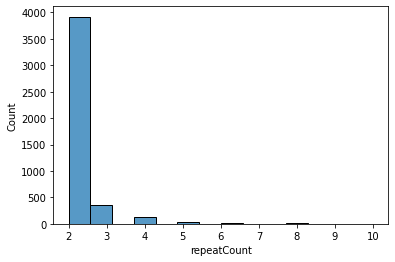

In [56]:
sns.histplot(x = df["repeatCount"])

In [57]:
df.repeatCount.skew()

4.947515422404222

In [58]:
df.repeatCount.value_counts()

2     3918
3      354
4      133
5       39
6       21
8        9
10       3
7        3
9        1
Name: repeatCount, dtype: int64

In [59]:
df.repeatCount.unique()

array([ 2,  3,  4,  5,  8,  6,  9, 10,  7])

In [60]:
df[df["repeatCount"] == 8].index.tolist()

[376, 1172, 3063, 4160, 4604, 4957, 6213, 6823, 9638]

In [61]:
index_pos=[]
for i in [7,8,9,10]:
    index = df[df["repeatCount"] == i].index.values.tolist()
    for j in index:
        index_pos.append(j)
    
# index_pos

In [62]:
df.drop(index_pos,inplace=True)
df[df["repeatCount"]==8]

,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal,0,1,2,3,4,5,6,7,8,9


In [63]:
df.repeatCount.value_counts()

2    3918
3     354
4     133
5      39
6      21
Name: repeatCount, dtype: int64

In [64]:
df['repeatCount'] = np.log1p(df['repeatCount'])

<AxesSubplot:xlabel='repeatCount', ylabel='Count'>

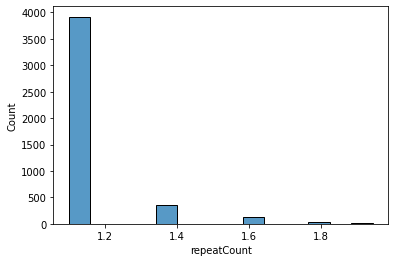

In [65]:
sns.histplot(x = df["repeatCount"])

In [66]:
# Splitting into features and value to be predicted
X = df.drop(columns=['healTime'])
y = df[['healTime']]

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state=2529)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3259, 17), (1206, 17), (3259, 1), (1206, 1))

In [68]:
X_train.head()

,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal,0,1,2,3,4,5,6,7,8,9
8251,1.098612,P1,Others,Others,Others,Others,True,-0.493855,0.356314,0.181764,-0.722900,0.146970,-0.341144,1.008569,-0.119747,-0.079890,-0.400569
3936,1.386294,P1,Others,Others,Others,Others,False,-0.591152,0.655828,0.105239,-1.377826,-0.576891,-0.450021,1.200232,-0.427707,0.110018,-0.428437
8642,1.098612,P2,Compute,Operating System,Device Health,Memory,False,-1.279453,1.063690,0.640301,-0.738905,-0.049909,-0.293591,0.003147,0.040228,0.589306,-0.418000
7585,1.098612,P0,Compute,Operating System,Device Status,Device Down,False,-0.044948,0.755848,0.147049,-0.490602,0.312856,0.268870,-0.722757,0.010038,0.646166,0.502684
2489,1.386294,P1,Compute,Operating System,Device Status,Device Reboot,True,-0.453438,1.338987,0.615976,-1.042093,-0.354695,-0.421956,-0.356628,-0.329357,1.149702,0.006646


In [69]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [70]:
X_train[['priority', 'alert_autoheal']]= enc.fit_transform(X_train[['priority', 'alert_autoheal']])
# ordencd

In [71]:
# X_train[['priority', 'alert_autoheal']] = ordencd

In [72]:
X_train.head()

,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal,0,1,2,3,4,5,6,7,8,9
8251,1.098612,1.0,Others,Others,Others,Others,1.0,-0.493855,0.356314,0.181764,-0.722900,0.146970,-0.341144,1.008569,-0.119747,-0.079890,-0.400569
3936,1.386294,1.0,Others,Others,Others,Others,0.0,-0.591152,0.655828,0.105239,-1.377826,-0.576891,-0.450021,1.200232,-0.427707,0.110018,-0.428437
8642,1.098612,2.0,Compute,Operating System,Device Health,Memory,0.0,-1.279453,1.063690,0.640301,-0.738905,-0.049909,-0.293591,0.003147,0.040228,0.589306,-0.418000
7585,1.098612,0.0,Compute,Operating System,Device Status,Device Down,0.0,-0.044948,0.755848,0.147049,-0.490602,0.312856,0.268870,-0.722757,0.010038,0.646166,0.502684
2489,1.386294,1.0,Compute,Operating System,Device Status,Device Reboot,1.0,-0.453438,1.338987,0.615976,-1.042093,-0.354695,-0.421956,-0.356628,-0.329357,1.149702,0.006646


In [73]:
X_test[['priority', 'alert_autoheal']] = enc.fit_transform(X_test[['priority', 'alert_autoheal']])

In [74]:
# X_test[['priority', 'alert_autoheal']] = ordencd1

In [75]:
X_test.head()

,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal,0,1,2,3,4,5,6,7,8,9
8123,1.386294,2.0,Network,Router,Device Health,Temperature,1.0,0.034140,-0.053645,0.210377,-0.253238,0.286519,0.079446,-0.280185,0.293900,0.191699,-0.282415
776,1.098612,2.0,Others,Others,Others,Others,1.0,-1.114618,0.951907,0.590718,-1.022469,0.363844,-0.237831,0.853728,-0.444153,0.585651,-0.543517
7181,1.098612,1.0,Others,Others,Others,Others,1.0,-0.963137,0.260027,-0.014600,-1.379475,0.419669,-0.290852,-0.556047,-0.264788,0.702393,0.489410
4128,1.098612,1.0,Others,Others,Others,Others,1.0,-1.061372,0.275180,0.088240,-1.396679,0.410977,-0.330585,-0.586660,-0.339530,0.653009,0.261056
8222,1.098612,2.0,Compute,Virtualization,Device Health,CPU,1.0,-0.569165,0.573296,0.156904,-0.932340,0.055348,0.127038,-1.139584,0.013670,0.783569,0.326449


In [76]:
ohe = OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)
ohe.fit_transform(X_train[["alertClass","alertSubClass","alertCategory","alertSubCategory"]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [77]:
def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[["alertClass","alertSubClass","alertCategory","alertSubCategory"]]), columns=ohe.get_feature_names_out())
    df.drop(columns=["alertClass","alertSubClass","alertCategory","alertSubCategory"], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [78]:
X_train = get_ohe(X_train)
X_train.head()

,repeatCount,priority,alert_autoheal,0,1,2,3,4,5,6,...,alertSubCategory_Disk Utilization,alertSubCategory_Interface Down,alertSubCategory_Memory,alertSubCategory_Monitoring Failure,alertSubCategory_Opsramp Cloud Connectivity,alertSubCategory_Others,alertSubCategory_Temperature,alertSubCategory_Third Party Application Service,alertSubCategory_Webservice Performance,alertSubCategory_Website Down
0,1.098612,1.0,1.0,-0.493855,0.356314,0.181764,-0.722900,0.146970,-0.341144,1.008569,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.386294,1.0,0.0,-0.591152,0.655828,0.105239,-1.377826,-0.576891,-0.450021,1.200232,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.098612,2.0,0.0,-1.279453,1.063690,0.640301,-0.738905,-0.049909,-0.293591,0.003147,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.098612,0.0,0.0,-0.044948,0.755848,0.147049,-0.490602,0.312856,0.268870,-0.722757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.386294,1.0,1.0,-0.453438,1.338987,0.615976,-1.042093,-0.354695,-0.421956,-0.356628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
X_test = get_ohe(X_test)
X_test.head()

,repeatCount,priority,alert_autoheal,0,1,2,3,4,5,6,...,alertSubCategory_Disk Utilization,alertSubCategory_Interface Down,alertSubCategory_Memory,alertSubCategory_Monitoring Failure,alertSubCategory_Opsramp Cloud Connectivity,alertSubCategory_Others,alertSubCategory_Temperature,alertSubCategory_Third Party Application Service,alertSubCategory_Webservice Performance,alertSubCategory_Website Down
0,1.386294,2.0,1.0,0.034140,-0.053645,0.210377,-0.253238,0.286519,0.079446,-0.280185,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.098612,2.0,1.0,-1.114618,0.951907,0.590718,-1.022469,0.363844,-0.237831,0.853728,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.098612,1.0,1.0,-0.963137,0.260027,-0.014600,-1.379475,0.419669,-0.290852,-0.556047,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.098612,1.0,1.0,-1.061372,0.275180,0.088240,-1.396679,0.410977,-0.330585,-0.586660,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.098612,2.0,1.0,-0.569165,0.573296,0.156904,-0.932340,0.055348,0.127038,-1.139584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# ohe = OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)

In [81]:
# ohedata = ohe.fit_transform(X_train[["alertClass","alertSubClass","alertCategory","alertSubCategory"]])

In [82]:
# ohedata

In [83]:
# columns = ohe.get_feature_names()
# print(len(columns))
# columns

In [84]:
# X_train.drop(columns=["alertClass","alertSubClass","alertCategory","alertSubCategory"], axis = 1, inplace = True)

In [85]:
# X_train[columns] = ohedata
# X_train.head()

In [86]:
# ohedata1 = ohe.transform(X_test[["alertClass","alertSubClass","alertCategory","alertSubCategory"]])
# ohedata1

In [87]:
# X_test.drop(columns=["alertClass","alertSubClass","alertCategory","alertSubCategory"], axis = 1, inplace = True)

In [88]:
# X_test[columns] = ohedata1
# X_test.head()

In [89]:
# for i in ["alertClass","alertSubClass","alertCategory","alertSubCategory"]:
#     ohe = OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)
#     encoded_array=ohe.fit_transform(X_train[[i]])
#     X_train[ohe.get_feature_names_out()] = encoded_array
    
# X_train.head()

In [90]:
from sklearn.linear_model import QuantileRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [91]:
coeff = []
colors = ['orange', 'lime', 'yellow', 'cyan', 'violet']
i=0
handles = []
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

In [92]:
# for quantile in quantiles:
#     qr = QuantileRegressor(quantile=quantile, alpha=0)
#     qr.fit(X_train, y_train)
#     y_pred = qr.predict(X_test)
#     print(y_pred)

## LGBMRegressor(Objective Quantile)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3259, 45), (1206, 45), (3259, 1), (1206, 1))

In [94]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [95]:
regressor = lgb.LGBMRegressor()
regressor.fit(X_train, y_train)
regressor_pred = regressor.predict(X_test)

In [96]:
lower = lgb.LGBMRegressor(objective = 'quantile', alpha = 1 - 0.95)
lower.fit(X_train, y_train)
lower_pred = lower.predict(X_test)

In [97]:
upper = lgb.LGBMRegressor(objective = 'quantile', alpha = 0.95)
upper.fit(X_train, y_train)
upper_pred = upper.predict(X_test)

In [98]:
score = r2_score(y_test, regressor_pred)
print(score)

0.7626100757896871


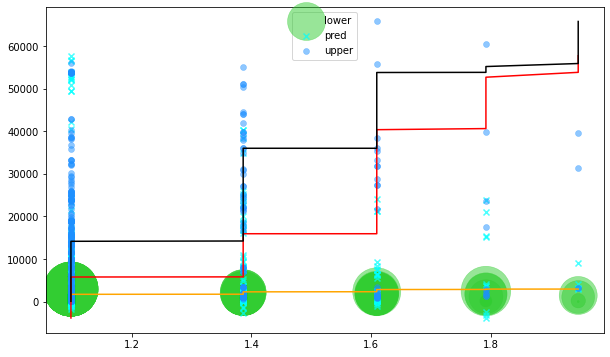

In [99]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test.repeatCount, lower_pred, lower_pred, color='limegreen', marker='o', label='lower', lw=0.5, alpha=0.5)
plt.scatter(X_test.repeatCount, regressor_pred, color='aqua', marker='x', label='pred', alpha=0.7)
plt.scatter(X_test.repeatCount, upper_pred, color='dodgerblue', marker='o', label='upper', lw=0.5, alpha=0.5)
plt.plot(sorted(X_test.repeatCount), sorted(lower_pred), color='orange')
plt.plot(sorted(X_test.repeatCount), sorted(regressor_pred), color='red')
plt.plot(sorted(X_test.repeatCount), sorted(upper_pred), color='black')
plt.legend()

plt.show()

## LinearRegression

In [100]:
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt

In [101]:
reg = linear_model.LinearRegression()

In [102]:
reg.fit(X_train, y_train)

LinearRegression()

In [103]:
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [[ 5.12815952e+03  1.46744573e+03 -1.04021866e+04  1.12174062e+04
   9.29016083e+03  1.51446777e+04 -2.45003706e+04  1.31763523e+04
  -1.68123430e+03 -4.79804873e+02  2.60993108e+04 -1.22144610e+04
   2.72739335e+02 -2.14932840e+15 -5.59937416e+14 -1.01179249e+15
   8.73098361e+14  1.13753592e+15  8.71998806e+14 -4.51855070e+14
  -6.65804539e+02  4.03169280e+02 -1.24936198e+15  1.13753592e+15
  -1.15170034e+15 -1.85324829e+03 -1.72774363e+13 -2.87482861e+14
  -8.25302642e+14  2.30555197e+14  1.02638505e+14 -3.35589082e+15
   1.05585784e+15 -2.08616365e+03 -8.54825855e+02  1.05585784e+15
   1.27916691e+14  1.05585784e+15  5.18038058e+14  5.18038058e+14
   8.29556367e+14  1.05585784e+15  4.68124695e+14  3.70463055e+14
   3.87740491e+14]]
Variance score: 0.33883895129087005


In [104]:
# Making predictions on the testing set
y_pred = reg.predict(X_test)

In [105]:
print("RScore. ", reg.score(X_test, y_test))

RScore.  0.33883895129087005


In [106]:
from sklearn.metrics import r2_score

In [107]:
r2_score(y_test, y_pred)

0.33883895129087005

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3053.160966003317
MSE: 36224341.84689832
RMSE: 6018.666118576301


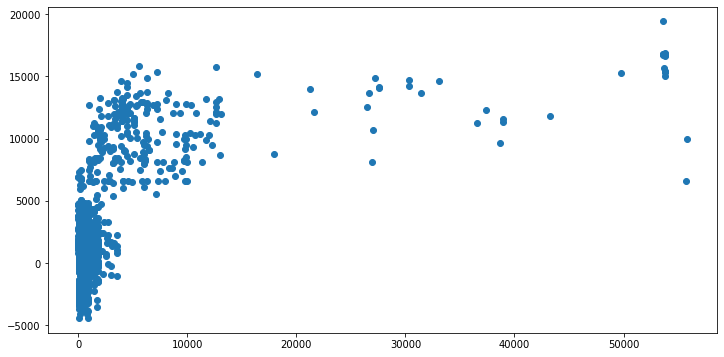

In [109]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred)
plt.show()

## Lazy Predict: fit and evaluate all the models from scikit-learn with a single line of code

In [110]:
from lazypredict.Supervised import LazyRegressor

In [111]:
lazyreg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [112]:
models, predictions = lazyreg.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 42/42 [19:46<00:00, 28.24s/it]


In [113]:
print(models)

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
LGBMRegressor                                0.77       0.78  3474.37   
HistGradientBoostingRegressor                0.76       0.77  3557.14   
XGBRegressor                                 0.74       0.75  3686.43   
RandomForestRegressor                        0.73       0.74  3779.23   
BaggingRegressor                             0.72       0.73  3813.85   
GradientBoostingRegressor                    0.72       0.73  3833.58   
ExtraTreesRegressor                          0.71       0.72  3939.63   
KNeighborsRegressor                          0.65       0.66  4319.16   
DecisionTreeRegressor                        0.62       0.63  4493.12   
PoissonRegressor                             0.54       0.56  4921.42   
ExtraTreeRegressor                           0.50       0.52  5143.82   
RidgeCV                                      0.31  

In [114]:
print(predictions)

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
LGBMRegressor                                0.77       0.78  3474.37   
HistGradientBoostingRegressor                0.76       0.77  3557.14   
XGBRegressor                                 0.74       0.75  3686.43   
RandomForestRegressor                        0.73       0.74  3779.23   
BaggingRegressor                             0.72       0.73  3813.85   
GradientBoostingRegressor                    0.72       0.73  3833.58   
ExtraTreesRegressor                          0.71       0.72  3939.63   
KNeighborsRegressor                          0.65       0.66  4319.16   
DecisionTreeRegressor                        0.62       0.63  4493.12   
PoissonRegressor                             0.54       0.56  4921.42   
ExtraTreeRegressor                           0.50       0.52  5143.82   
RidgeCV                                      0.31  

In [115]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVR
import xgboost as xgb

In [116]:
models = []
models.append(('LR', LinearRegression()))
models.append(('PCA', PCA()))
models.append(('RF', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', LinearSVR()))
models.append(('XGBOOST', xgb))

In [117]:
# A categorical variable has values that you can put into a countable number of distinct groups based on a 
# characteristic